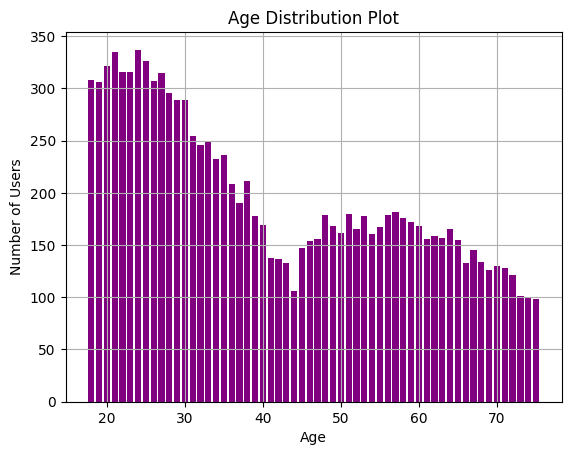

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(42)

x_age_group_1 = np.linspace(18, 45, num=45-17) # this will be the linear space for ages 18 to 35
y_age_group_1 = stats.norm.pdf(x_age_group_1, loc=23, scale=15)
y_age_group_1 += np.random.normal(0, 0.001, len(x_age_group_1))

y_age_group_1_scaled = y_age_group_1 * 12000 # we have 12 000 users in total distributed across this age group

x_age_group_2 = np.linspace(45, 75, num=75-44)
y_age_group_2 = stats.norm.pdf(x_age_group_2, loc=55, scale=18)
y_age_group_2 += np.random.normal(0, 0.001, len(x_age_group_2)) # add some noise to the data

y_age_group_2_scaled = y_age_group_2 * 8000 # we have 8 000 users in total distributed across this age group

x_final = np.concatenate((x_age_group_1, x_age_group_2))
y_final = np.concatenate((y_age_group_1_scaled, y_age_group_2_scaled))

x_final = x_final.astype(int)
y_final = np.round(y_final).astype(int)

plt.bar(x_final, y_final, color='purple')
plt.title('Age Distribution Plot')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.grid()

plt.show()

### CSV generation of no. of users of each Age

In [2]:
import pandas as pd

# to csv
df = pd.DataFrame({'age': x_final, 'users': y_final})
# df.to_csv('age_distribution_2.csv', index=False)

age_list = []

# Iterate through the DataFrame and repeat the age according to the number of users
for index, row in df.iterrows():
    age_list.extend([row['age']] * row['users'])

age_list

max_size = 1000

split_age_list = [age_list[i:i + max_size] for i in range(0, len(age_list), max_size)]

for i, sublist in enumerate(split_age_list):
    age_df = pd.DataFrame({ 'age': sublist })
    age_df.to_csv(f'age_data_{i}.csv', index=False, header=False)